In [2]:
print("Hello, Retail Sales Analysis!")

Hello, Retail Sales Analysis!


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate 1000 rows of data
n_rows = 1000
dates = [datetime(2023, 1, 1) + timedelta(days=x) for x in range(n_rows)]
products = ['Laptop', 'T-Shirt', 'Headphones', 'Jeans', 'Smartphone', 'Jacket', 'Mouse', 'Shoes']
categories = ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing']
regions = ['East', 'West', 'North', 'South']
customer_ids = [f'C{str(i).zfill(3)}' for i in range(1, 201)]

# Create data
data = {
    'Order_Date': [random.choice(dates).strftime('%Y-%m-%d') for _ in range(n_rows)],
    'Product': [random.choice(products) for _ in range(n_rows)],
    'Category': [random.choice(categories) if random.random() > 0.05 else np.nan for _ in range(n_rows)],  # 5% missing
    'Region': [random.choice(regions) for _ in range(n_rows)],
    'Sales': [round(random.uniform(10, 2000), 2) if random.random() > 0.03 else np.nan for _ in range(n_rows)],  # 3% missing
    'Customer_ID': [random.choice(customer_ids) for _ in range(n_rows)]
}

# Introduce some string errors in Sales
df = pd.DataFrame(data)
for i in random.sample(range(n_rows), 10):  # 10 rows with string errors
    df.loc[i, 'Sales'] = f"${df.loc[i, 'Sales']}"

# Save to CSV
df.to_csv('retail_sales.csv', index=False)
print("Dataset generated and saved as 'retail_sales.csv'")

Dataset generated and saved as 'retail_sales.csv'


C:\Users\omkar Tulsi Das\AppData\Local\Temp\ipykernel_16452\2581954263.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '$1008.63' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Sales'] = f"${df.loc[i, 'Sales']}"


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('retail_sales.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic info
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
   Order_Date     Product     Category Region    Sales Customer_ID
0  2024-10-16      Jacket  Electronics  South   534.07        C153
1  2023-04-25       Mouse     Clothing  South    11.43        C176
2  2023-01-26  Smartphone     Clothing   East    764.3        C106
3  2025-01-29       Mouse     Clothing  South    47.25        C082
4  2023-10-09  Smartphone     Clothing  South  1554.27        C116

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_Date   1000 non-null   object
 1   Product      1000 non-null   object
 2   Category     957 non-null    object
 3   Region       1000 non-null   object
 4   Sales        975 non-null    object
 5   Customer_ID  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None


In [7]:
# Basic exploration
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique Categories:")
print(df['Category'].unique())
print("\nUnique Regions:")
print(df['Region'].unique())

Dataset Shape: (1000, 6)

Column Data Types:
Order_Date     object
Product        object
Category       object
Region         object
Sales          object
Customer_ID    object
dtype: object

Summary Statistics:
        Order_Date Product     Category Region   Sales Customer_ID
count         1000    1000          957   1000     975        1000
unique         637       8            2      4     972         199
top     2023-09-29   Shoes  Electronics   West  186.01        C183
freq             6     141          483    259       2          11

Missing Values:
Order_Date      0
Product         0
Category       43
Region          0
Sales          25
Customer_ID     0
dtype: int64

Unique Categories:
['Electronics' 'Clothing' nan]

Unique Regions:
['South' 'East' 'North' 'West']


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\omkar Tulsi Das\AppData\Local\Temp\ipykernel_16452\2427091407.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Sales'] = pd.to_numeric(df['Sales'].replace('[\$,]', '', regex=True), errors='coerce')


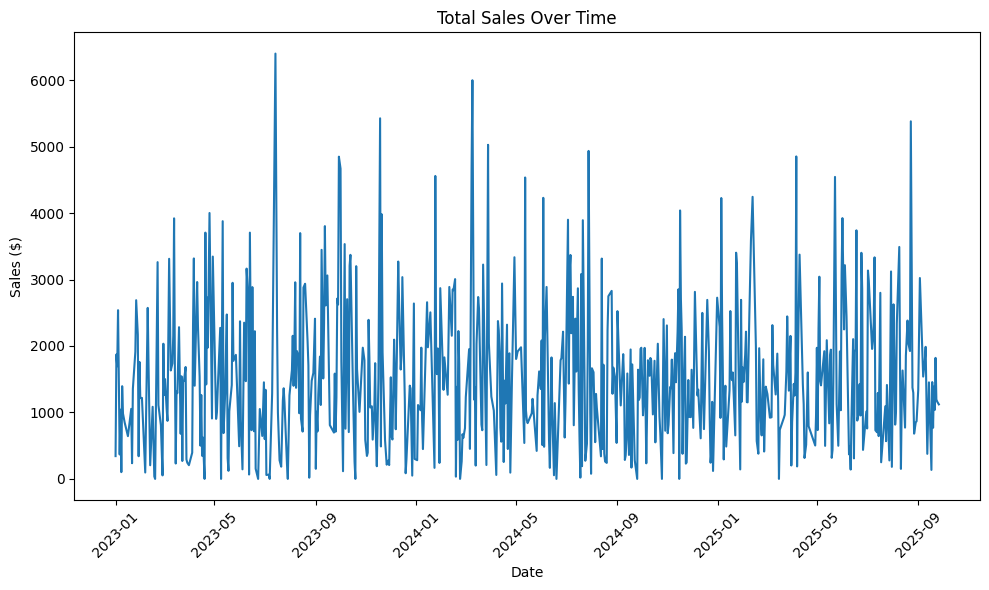

In [10]:
# Convert Order_Date to datetime (temporary for visualization)
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Remove dollar signs and convert to float
df['Sales'] = pd.to_numeric(df['Sales'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with missing sales
df_clean = df.dropna(subset=['Sales'])

# Group sales by date
sales_by_date = df.groupby('Order_Date')['Sales'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_date, x='Order_Date', y='Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

First 5 rows of the dataset:
   Order_Date     Product     Category Region    Sales Customer_ID
0  2024-10-16      Jacket  Electronics  South   534.07        C153
1  2023-04-25       Mouse     Clothing  South    11.43        C176
2  2023-01-26  Smartphone     Clothing   East    764.3        C106
3  2025-01-29       Mouse     Clothing  South    47.25        C082
4  2023-10-09  Smartphone     Clothing  South  1554.27        C116

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_Date   1000 non-null   object
 1   Product      1000 non-null   object
 2   Category     957 non-null    object
 3   Region       1000 non-null   object
 4   Sales        975 non-null    object
 5   Customer_ID  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None

Dataset Shape: (1000, 6)

Column Data Types:
Order_Date     object
Product

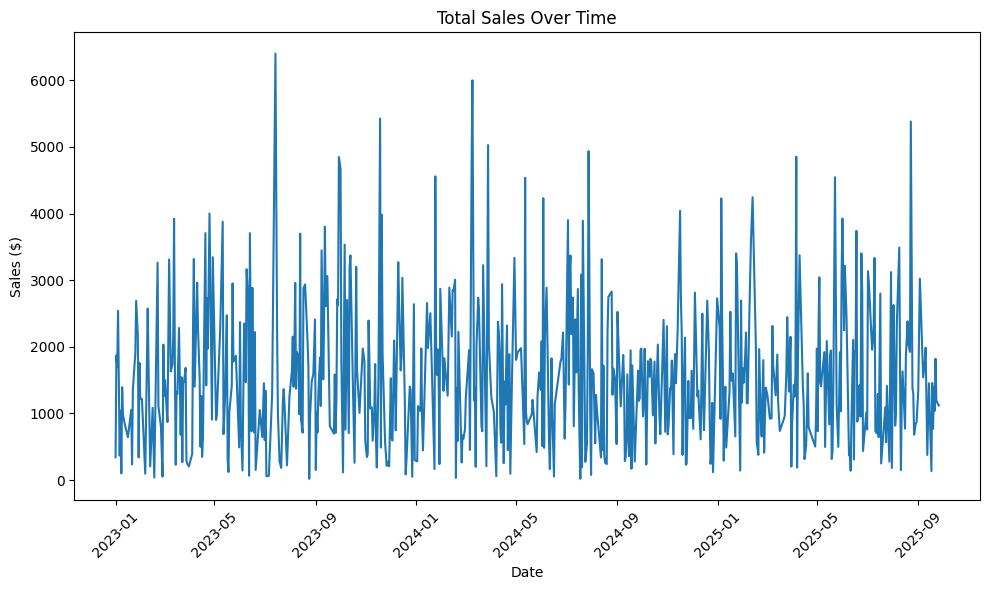

In [11]:
# ------------------------------------------------
# Phase 1: Setup & Data Exploration
# ------------------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('retail_sales.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic info
print("\nDataset Info:")
print(df.info())

# ------------------------------------------------
# Phase 2: Data Exploration
# ------------------------------------------------

# Basic exploration
print("\nDataset Shape:", df.shape)

print("\nColumn Data Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique Categories:")
print(df['Category'].unique())

print("\nUnique Regions:")
print(df['Region'].unique())

print("\nUnique Products:")
print(df['Product'].unique())

# ------------------------------------------------
# Phase 3: Cleaning and Preprocessing
# ------------------------------------------------

# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Clean the 'Sales' column (remove $, commas and convert to float)
df['Sales_Clean'] = pd.to_numeric(
    df['Sales'].astype(str).str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
)

# Drop rows with missing 'Sales_Clean' or 'Order_Date'
df_clean = df.dropna(subset=['Sales_Clean', 'Order_Date'])

# ------------------------------------------------
# Phase 4: Basic Sales Trend Visualization
# ------------------------------------------------

# Group sales by date
sales_by_date = df_clean.groupby('Order_Date')['Sales_Clean'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_date, x='Order_Date', y='Sales_Clean')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show the plot
plt.savefig('sales_trend.png')
plt.show()
